In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly


mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows', 500)
sns.set(style="darkgrid")

import plotly.graph_objects as go

In [2]:
datapath= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179835,179835,180086,180122,180174,180259,180347,180419,180520,180584
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275985,276012,276048,276081,276101,276101,276101,276221,276221,276310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265862,265864,265870,265873,265873,265877,265884,265887,265889,265889
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,42894,42894,43067
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99527,99527,99761,99761,99761,99761,99761


In [4]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/25/22', '5/26/22', '5/27/22', '5/28/22', '5/29/22', '5/30/22',
       '5/31/22', '6/1/22', '6/2/22', '6/3/22'],
      dtype='object', length=868)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot= pd.DataFrame({ 'Date':
                       time_idx
    
})
df_plot.head()

,Date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [8]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [9]:
pd_raw[pd_raw['Country/Region']=='US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
257,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,83731365,83876716,83984555,83997048,83991127,84050841,84217768,84451901,84570325,84724329


In [10]:
import numpy as np
country_list=['Italy', 'US', 'Spain','Germany', 'Korea,South']

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [12]:
df_plot

,Date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0.0
1,1/23/20,0,1,0,0,0.0
2,1/24/20,0,2,0,0,0.0
3,1/25/20,0,2,0,0,0.0
4,1/26/20,0,5,0,0,0.0
...,...,...,...,...,...,...
859,5/30/22,17396723,84050841,12326264,26305996,0.0
860,5/31/22,17421410,84217768,12326264,26360953,0.0
861,6/1/22,17440232,84451901,12360256,26409455,0.0
862,6/2/22,17457950,84570325,12360256,26452148,0.0


<AxesSubplot:xlabel='Date'>

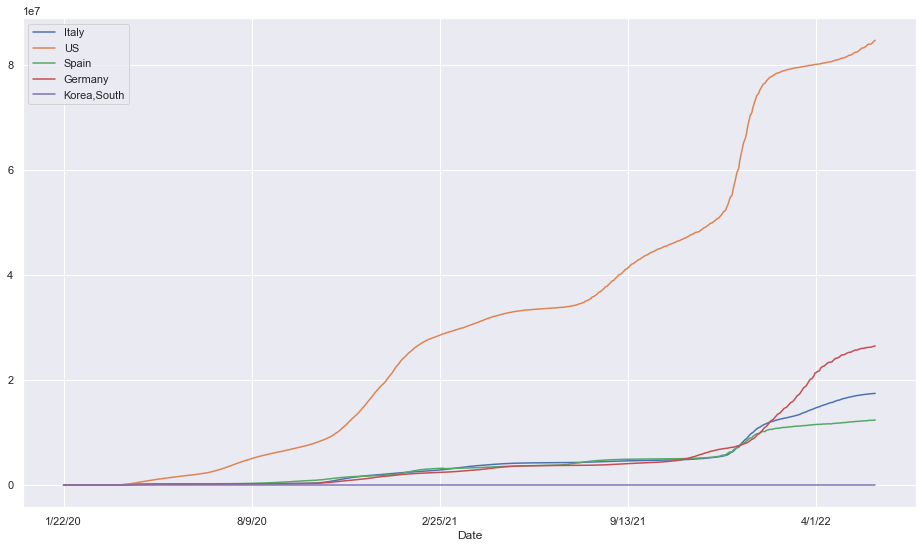

In [13]:
df_plot.set_index('Date').plot()

In [14]:
# section 4.2 done Conversion of Date Objects

In [15]:
df_plot.head()

,Date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0.0
1,1/23/20,0,1,0,0,0.0
2,1/24/20,0,2,0,0,0.0
3,1/25/20,0,2,0,0,0.0
4,1/26/20,0,5,0,0,0.0


In [16]:
from datetime import datetime

In [17]:
df_plot.Date[0]

'1/22/20'

In [18]:
datetime.strptime(df_plot.Date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [19]:
time_idx=[datetime.strptime(each, '%m/%d/%y') for each in df_plot.Date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [20]:
time_idx

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0,

In [21]:
df_plot['Date']=time_idx
type(df_plot['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
df_plot.head()

,Date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0


In [23]:
df_plot.to_csv('processed.csv', sep=';', index=False)

In [24]:
df_plot

,Date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0
...,...,...,...,...,...,...
859,2022-05-30,17396723,84050841,12326264,26305996,0.0
860,2022-05-31,17421410,84217768,12326264,26360953,0.0
861,2022-06-01,17440232,84451901,12360256,26409455,0.0
862,2022-06-02,17457950,84570325,12360256,26452148,0.0


In [25]:
# section 4.3 done Relational data structures

In [26]:
import pandas as pd

In [27]:
datapath= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [28]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179835,179835,180086,180122,180174,180259,180347,180419,180520,180584
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275985,276012,276048,276081,276101,276101,276101,276221,276221,276310
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265862,265864,265870,265873,265873,265877,265884,265887,265889,265889
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,42894,42894,43067
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99527,99527,99761,99761,99761,99761,99761


In [29]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state' })

In [30]:
pd_data_base

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,179835,179835,180086,180122,180174,180259,180347,180419,180520,180584
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,275985,276012,276048,276081,276101,276101,276101,276221,276221,276310
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265862,265864,265870,265873,265873,265877,265884,265887,265889,265889
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,42894,42894,43067
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99527,99527,99527,99527,99527,99761,99761,99761,99761,99761
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8062,8119,8119,8119,8119,8163,8253,8253,8295,8295
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9178795,9178795,9178795,9178795,9230573,9230573,9230573,9230573,9230573,9230573
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422939,422939,422939,422939,422939,422963,422963,422963,422963,422963
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,128440,129263,130085,130664,130664,131938,132735,133582,134286,134286


In [31]:
pd_data_base=pd_data_base.drop(['Lat', 'Long'], axis=1)

In [32]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/25/22,5/26/22,5/27/22,5/28/22,5/29/22,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,179835,179835,180086,180122,180174,180259,180347,180419,180520,180584
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275985,276012,276048,276081,276101,276101,276101,276221,276221,276310
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265862,265864,265870,265873,265873,265877,265884,265887,265889,265889
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42894,42894,42894,42894,42894,42894,42894,42894,42894,43067
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99527,99527,99527,99527,99527,99761,99761,99761,99761,99761


In [33]:
pd_data_base.set_index(['state','country'])

1/22/20  \
state                                        country                                     
NaN                                          Afghanistan                             0   
                                             Albania                                 0   
                                             Algeria                                 0   
                                             Andorra                                 0   
                                             Angola                                  0   
                                             Antarctica                              0   
                                             Antigua and Barbuda                     0   
                                             Argentina                               0   
                                             Armenia                                 0   
Australian Capital Territory                 Australia                               0   
New South Wales                              Australia                               0   
Northern Territory                           Australia                               0   
Queensland                                   Australia                               0   
South Australia                              Australia                               0   
Tasmania                                     Australia                               0   
Victoria                                     Australia                               0   
Western Australia                            Australia                               0   
NaN                                          Austria                                 0   
                                             Azerbaijan                              0   
                                             Bahamas                                 0   
                                             Bahrain                                 0   
                                             Bangladesh                              0   
                                             Barbados                                0   
                                             Belarus                                 0   
                                             Belgium                                 0   
                                             Belize                                  0   
                                             Benin                                   0   
                                             Bhutan                                  0   
                                             Bolivia                                 0   
                                             Bosnia and Herzegovina                  0   
                                             Botswana                                0   
                                             Brazil                                  0   
                                             Brunei                                  0   
                                             Bulgaria                                0   
                                             Burkina Faso                            0   
                                             Burma                                   0   
                                             Burundi                                 0   
                                             Cabo Verde                              0   
                                             Cambodia                                0   
                                             Cameroon                                0   
Alberta                                      Canada                                  0   
British Columbia                             Canada                                  0   
Diamond Princess                             Canada                                  0   
Grand Princess               

In [34]:
test_pd=pd_data_base.set_index(['state','country']).T
test_pd

state           NaN                                            \
country Afghanistan Albania Algeria Andorra Angola Antarctica   
1/22/20           0       0       0       0      0          0   
1/23/20           0       0       0       0      0          0   
1/24/20           0       0       0       0      0          0   
1/25/20           0       0       0       0      0          0   
1/26/20           0       0       0       0      0          0   
...             ...     ...     ...     ...    ...        ...   
5/30/22      180259  276101  265877   42894  99761         11   
5/31/22      180347  276101  265884   42894  99761         11   
6/1/22       180419  276221  265887   42894  99761         11   
6/2/22       180520  276221  265889   42894  99761         11   
6/3/22       180584  276310  265889   43067  99761         11   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   
...                     ...       ...     ...                          ...   
5/30/22                8163   9230573  422963                       131938   
5/31/22                8253   9230573  422963                       132735   
6/1/22                 8253   9230573  422963                       133582   
6/2/22                 8295   9230573  422963                       134286   
6/3/22                 8295   9230573  422963                       134286   

state    ...     NaN                                         \
country  ... Uruguay Uzbekistan Vanuatu Venezuela   Vietnam   
1/22/20  ...       0          0       0         0         0   
1/23/20  ...       0          0       0         0         2   
1/24/20  ...       0          0       0         0         2   
1/25/20  ...       0          0       0         0         2   
1/26/20  ...       0          0       0         0         2   
...      ...     ...        ...     ...       ...       ...   
5/30/22  ...  916388     239025    9043    523618  10718369   
5/31/22  ...  925777     239028    9088    523654  10719379   
6/1/22   ...  925777     239046    9223    523710  10720426   
6/2/22   ...  925777     239059    9438    523710  10722634   
6/3/22   ...  925777     239077    9445    523769  10723673   

state                                                                    
country West Bank and Gaza Winter Olympics 2022  Yemen  Zambia Zimbabwe  
1/22/20                  0                    0      0       0        0  
1/23/20                  0                    0      0       0        0  
1/24/20                  0                    0      0       0        0  
1/25/20                  0                    0      0       0        0  
1/26/20                  0                    0      0       0        0  
...                    ...                  ...    ...     ...      ...  
5/30/22             657573                  535  11822  321503   252092  
5/31/22             657705                  535  11822  321779   252398  
6/1/22              657705                  535  11822  321915   252874  
6/2/22              657705                  535  11822  321915   253051  
6/3/22              657705                  535  11822  322207   253236  

[864 rows x 285 columns]

In [35]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [36]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
246235,6/3/22,Western Australia,Australia,765645.0
246236,6/3/22,Xinjiang,China,1008.0
246237,6/3/22,Yukon,Canada,4397.0
246238,6/3/22,Yunnan,China,2152.0


In [37]:
pd_relational_model=pd_data_base.set_index(['state', 'country'])\
.T \
.stack(level=[0,1]) \
.reset_index() \
.rename(columns={'level_0':'date', 0:'confirmed'},
       )

In [38]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [39]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object